In [3]:
import numpy as np
from numpy.fft import fft, ifft, rfft
from scipy.signal import stft
import scipy.signal as signal
import matplotlib.pyplot as plt

from data.metadata.vcc import VCC2016TrainMetadata
from env import *


plt.style.use({'figure.facecolor':'white'})


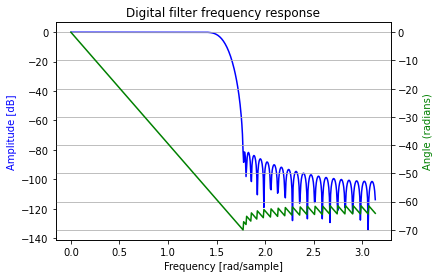

In [23]:
def plot_response(sr, b, a=1, title=''):
    w, h = signal.freqz(b, a, fs=sr)
    # plt.figure()
    # plt.xlabel('Frequency (Hz)')
    # plt.ylabel('Amplitude (linear scale)')
    # plt.title(title)
    # plt.plot(w, np.abs(h))
    fig, ax1 = plt.subplots()
    ax1.set_title('Digital filter frequency response')
    ax1.plot(w, 20 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Frequency [rad/sample]')
    ax2 = ax1.twinx()
    angles = np.angle(h)
    angles = np.unwrap(angles)
    ax2.plot(w, angles, 'g')
    ax2.set_ylabel('Angle (radians)', color='g')
    ax2.grid()
    ax2.axis('tight')
    plt.show()

b = signal.firwin(80, 0.5, window=('kaiser', 8))
w, h = signal.freqz(b)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()


# plot_response()

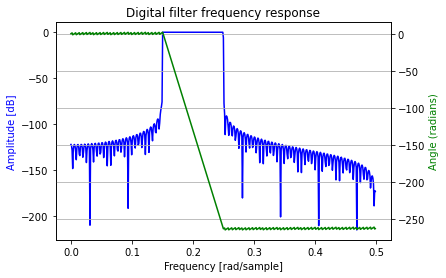

In [24]:
fir = signal.firwin(50000, [0.3,0.5], pass_zero='bandpass')

# # bandstop
# n = 201
# cutoff_c = f(950, sr)
# cutoff_b = f(250, sr)
# time_domain = (np.arange(n)-n//2)
# my_fir = 2*np.cos(np.pi*time_domain*cutoff_c)*cutoff_b*np.sinc(time_domain*cutoff_b)
# my_fir *= hamming(n)

iir = signal.butter(7,  [0.3, 0.5] , btype='bandpass')
# part1_process(sr, x, dir, fir, my_fir, iir)

plot_response(1, fir)

In [ ]:

sr=16000

def create_signal(f0=200, l=2048):
    s = np.zeros(l)
    t = np.linspace(0, l/sr, num=l)
    for i in range(20):
        s += np.sin(2*f0*i*np.pi*t) * (0.9)**i
    return s

f0=200
print('quef at ', sr/f0)
x = create_signal(f0, l=1024)

r_dft = np.abs(rfft(x))
f = np.linspace(0, sr/2, num=r_dft.size)
plt.figure()
plt.title('dft')
plt.plot(f, r_dft)
plt.xlabel('Hz')

log_dft = np.log(r_dft)
plt.figure()
plt.title('log dft')
plt.plot(f, log_dft)
plt.xlabel('Hz')

log_dft -= np.mean(log_dft)
sr1=log_dft.size/f[-1]
ceps = np.abs(rfft(log_dft))

f1=np.linspace(0,sr1/2, num=ceps.size)
plt.figure()
plt.stem(ceps)
plt.xlabel('Quef (samples)')
plt.figure()
plt.plot(ceps[:])


plt.figure()
plt.plot(np.abs(fft(np.log(np.abs(fft(x)))))[1:])

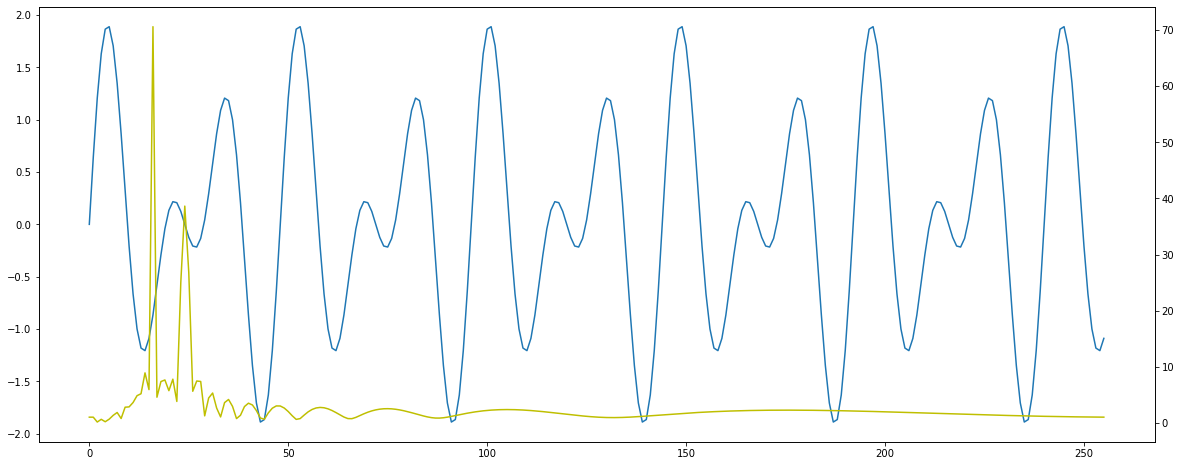

In [3]:
from data.transform.cepstrum import mod_cepstrum


def debug_mod_ceps(signal):
    plt.figure(figsize=(20,8))
    plt.plot(signal)
    mod_ceps = mod_cepstrum(signal)
    plt.twinx()
    plt.plot(np.abs(mod_ceps)[0:], c='y')



def experiment(signal, method):
    plt.figure(figsize=(20,8))
    plt.plot(signal)
    out = method(signal)
    plt.twinx()
    plt.plot(np.abs(out), c='y')




n_samples = 256
T = 16

debug_mod_ceps(np.sin(np.arange(n_samples)*2*np.pi/T)
               +np.sin(np.arange(n_samples)*2*np.pi/(T*1.5)))

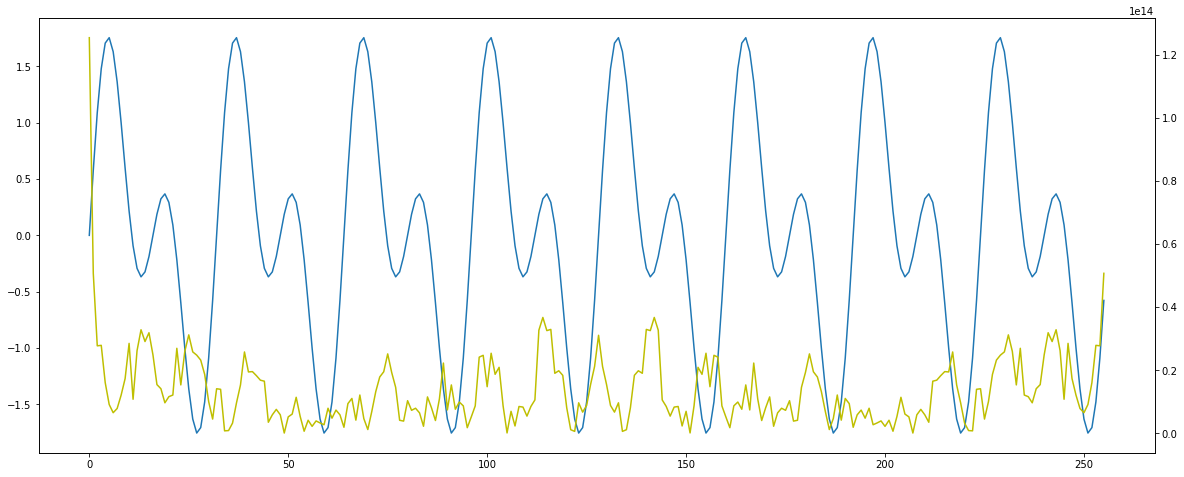

In [4]:
def smoothened_cepstrum(spec):
    spec = (ifft(np.log(np.abs(fft(spec)))))
    return np.abs(ifft(np.exp(np.abs(fft(spec)))))

experiment(np.sin(np.arange(n_samples)*2*np.pi/T)
               +np.sin(np.arange(n_samples)*2*np.pi/(T*2)),
           smoothened_cepstrum)

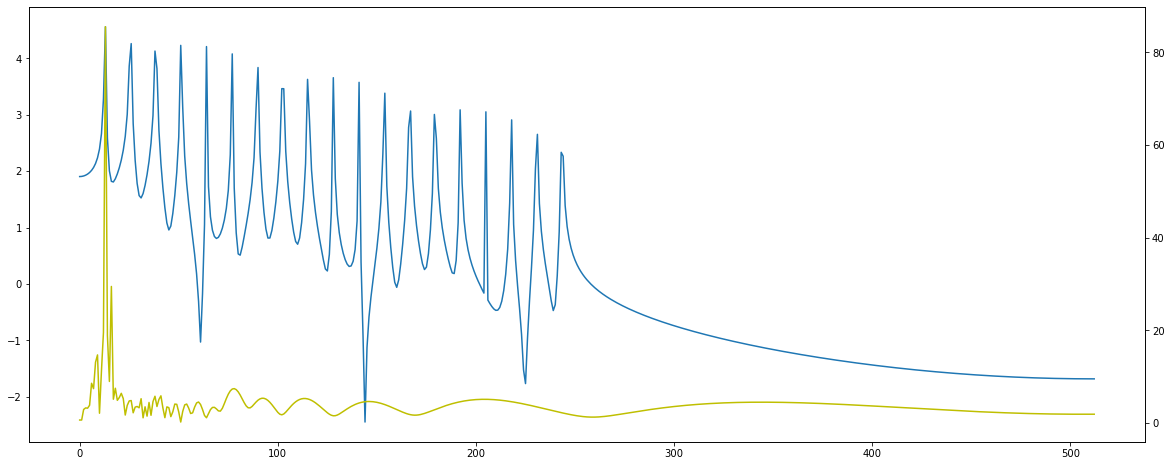

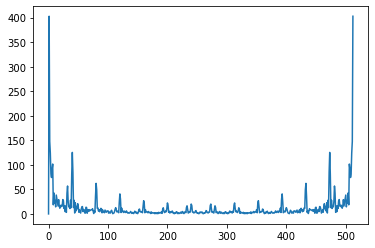

In [5]:
plt.figure(figsize=(20,8))
plt.plot(log_dft)
mod_ceps = mod_cepstrum(log_dft)
plt.twinx()
plt.plot(np.abs(mod_ceps)[0:], c='y')
plt.figure()
plt.plot(np.abs(fft(log_dft)))

In [ ]:
import data.transform.cepstrum as cepstrum

from numpy.fft import fft, rfft
from scipy.signal import convolve

def analyze(freq, frame):
    plt.figure()
    plt.plot(freq, frame)

    low_pass_filtered = convolve(frame, np.ones(10)/10, mode='same')
    hi_pass_filtered = frame - low_pass_filtered

    plt.figure()
    plt.plot(low_pass_filtered)
    plt.figure()
    plt.plot(hi_pass_filtered)

    plt.figure()
    mod_ceps = np.abs(cepstrum.mod_cepstrum(hi_pass_filtered))
    mod_ceps[0] = 0
    plt.plot(freq, mod_ceps)

